# Python Stock Market Analysis

In [2]:
!pip install yfinance

     ---------------------------------------- 60.3/60.3 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 502.3/502.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [3]:
import yfinance as yf
import pandas as pd

tesla_data = yf.download("TSLA", start="2020-01-01", end="2022-04-11")

tesla_df = pd.DataFrame(tesla_data)
print(tesla_df.head())

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  28.299999  28.713333  28.114000  28.684000  28.684000  142981500
2020-01-03  29.366667  30.266666  29.128000  29.534000  29.534000  266677500
2020-01-06  29.364668  30.104000  29.333332  30.102667  30.102667  151995000
2020-01-07  30.760000  31.441999  30.224001  31.270666  31.270666  268231500
2020-01-08  31.580000  33.232666  31.215334  32.809334  32.809334  467164500


In [16]:
import requests
from bs4 import BeautifulSoup

# URL of Tesla's Investor Relations website
url = 'https://ir.tesla.com/#quarterly-disclosure'

# Send an HTTP GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing quarterly revenue data
table = soup.find('table', {'class': 'accordion__table'})

# Find the rows in the table and extract the revenue data
rows = table.find_all('tr')
revenues = []
for row in rows[1:]:
    cells = row.find_all('td')
    revenue = float(cells[1].text.strip().replace(',', '')) * 1000  # Convert revenue to USD
    revenues.append(revenue)

print(revenues)


AttributeError: 'NoneType' object has no attribute 'find_all'

In [22]:
import requests
from bs4 import BeautifulSoup

url = 'https://ir.tesla.com/#quarterly-disclosure'

try:
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'summary': 'Quarterly Results'})
    rows = table.find_all('tr')
    revenues = []
    for row in rows[1:]:
        cells = row.find_all('tr')
        revenue = float(cells[1].text.strip().replace(',', '')) * 1000
        revenues.append(revenue)
    print(revenues)
except requests.exceptions.HTTPError as http_err:
    print(f'HTTP error occurred: {http_err}')
except Exception as err:
    print(f'Other error occurred: {err}')


Other error occurred: 'NoneType' object has no attribute 'find_all'


In [23]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL of Tesla's Investor Relations website
url = 'https://ir.tesla.com/#quarterly-disclosure'

# Send an HTTP GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing quarterly revenue data
table = soup.find('table', {'class': 'quarterly-results-table'})

# Find the rows in the table and extract the revenue data
rows = table.find_all('tr')
revenues = []
for row in rows[1:]:
    cells = row.find_all('td')
    revenue = float(cells[1].text.strip().replace(',', '')) * 1000  # Convert revenue to USD
    revenues.append(revenue)

# Create a dataframe from the revenues list
tesla_revenue = pd.DataFrame(revenues, columns=['Revenue'])

# Display the last five rows of the dataframe
print(tesla_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find_all'

In [25]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'GME'

# Get data on this ticker
gme_data = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
gme_data = gme_data.history(period='max')

# Reset the index
gme_data = gme_data.reset_index()
# Save the dataframe to a csv file
#gme_data.to_csv('gme_data.csv', index=False)

# Display the first five rows of the dataframe
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of GameStop's Investor Relations website
url = 'https://investor.gamestop.com/financial-information/quarterly-results/default.aspx'

# Send an HTTP GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing quarterly revenue data
table = soup.find('table', {'class': 'fsTable'})

# Find the rows in the table and extract the revenue data
rows = table.find_all('tr')[1:]
revenues = []
for row in rows:
    cells = row.find_all('td')
    revenue = float(cells[1].text.strip().replace('$', '').replace(',', ''))
    revenues.append(revenue)

# Create a dataframe with the revenue data
gme_revenue = pd.DataFrame({'Revenue': revenues})

# Display the last five rows of the dataframe
print(gme_revenue.tail())


AttributeError: 'NoneType' object has no attribute 'find'

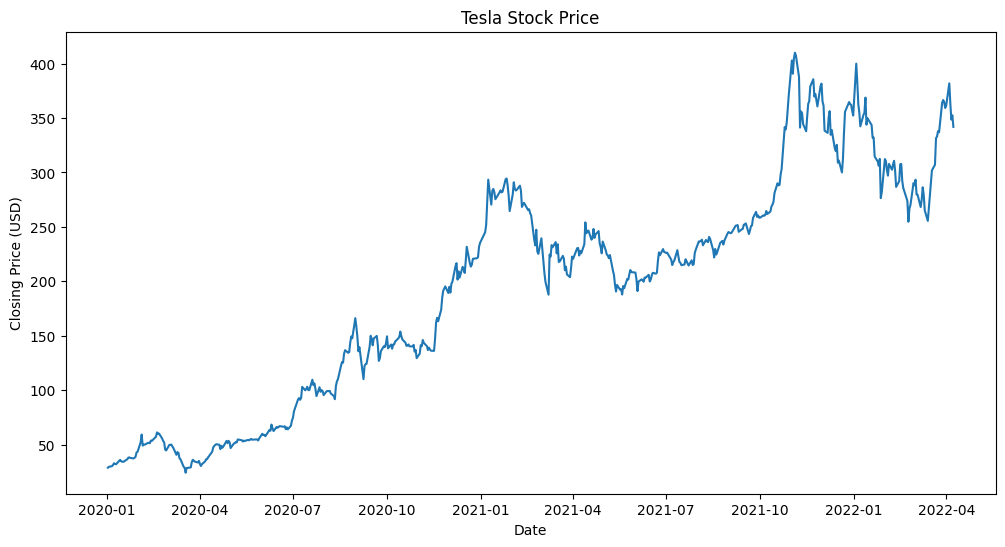

In [28]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'])
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.title(title)
    plt.show()

make_graph(tesla_data, 'Tesla Stock Price')
